In [5]:
#given an input catalogue, generates the list of reference targets and appends
#to a new file appended with 'reference_targets' """
import numpy as np
from astropy.io import fits, ascii
import astropy.units as u
from astropy.coordinates import SkyCoord
from scipy.spatial import cKDTree
import os
import tqdm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import nmmn.plots
import vorbin
wolfram=nmmn.plots.wolframcmap() # for Mathematica's cmap
parula=nmmn.plots.parulacmap() # for MATLAB's cmap
turbo=nmmn.plots.turbocmap() # Turbo
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [6]:
# LOAD THE DATA
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances
path = 'M33_Guide.fits'
tb = fits.open(path)
data = tb[1].data 
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances
path2 = 'M33_Main.fits'
tb2 = fits.open(path2)
data2 = tb2[1].data 

In [45]:
# path = 'm33.jpeg'
path = 'photsec_footprints.png'
img = plt.imread(path)

In [128]:
mask = (data2['Contam160WFraction']<0.02)*( data2['Contam160WFraction']>0)
print(len(data2[mask]))

5020


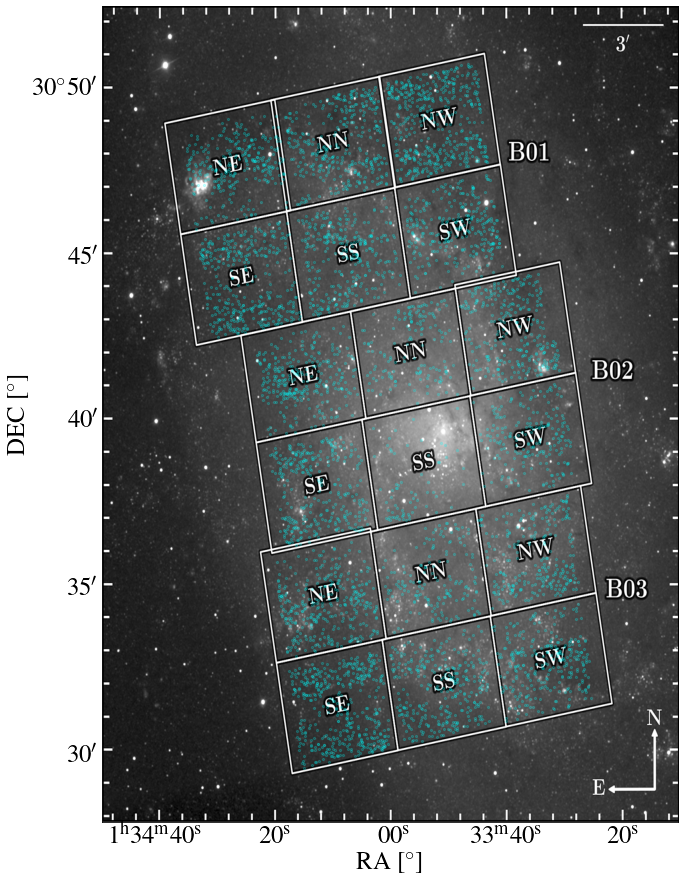

In [130]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(15,15),facecolor='white')
plt.imshow(img,extent=(15.71,15.42,30.465,30.875))

# plt.scatter(data['RA']*15.5646/23.5,data['DEC'],s=1,c='r',alpha=0.2)
plt.scatter(data2['RA'][mask]*15.5646/23.5,data2['DEC'][mask],s=5,c='cyan',alpha=0.2)
positions = (15.682,15.623,15.563,15.506,15.448)
labels = ('1$^{\mathrm{h}}$34$^{\mathrm{m}}$40$^{\mathrm{s}}$','20$^{\mathrm{s}}$','00$^{\mathrm{s}}$',\
          '33$^{\mathrm{m}}$40$^{\mathrm{s}}$','20$^{\mathrm{s}}$')
plt.xticks(positions,labels)
positions2 = (30.5,30.584,30.668,30.75,30.835)
labels2 = ('30$^{\prime}$','35$^{\prime}$','40$^{\prime}$','45$^{\prime}$','30$^{\circ}$50$^{\prime}$')
plt.yticks(positions2,labels2)
plt.tick_params(direction='in',color='white',length=10,labelsize=25,top=True,right=True)
plt.xlabel(r'RA [$^{\circ}$]',fontsize=25)
plt.ylabel(r'DEC [$^{\circ}$]',fontsize=25)

plt.tick_params(direction='in',color='white',length=0.01)


# plt.savefig('/Users/danny/Desktop/IGS-structure/plots/press_release_IGS.png', format='png', dpi=400, bbox_inches='tight')



In [53]:
print(np.max(data2['RA']*15.5646/23.5))

15.668158306277839
